# Random Forest Algorithm

In [1]:
import pandas as pd

from sklearn import preprocessing, tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score


### Load data

In [2]:
iris = pd.read_csv("../datasets/Iris.csv")
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Pre-process data

In [3]:
X = iris.drop(["Id", "Species"], axis=1)

le = preprocessing.LabelEncoder()
le.fit(iris["Species"])
# print(list(le.classes_))
y = le.transform(iris["Species"])

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle= True, random_state=42)

### Build model and evaluate

In [5]:

model = RandomForestClassifier(n_estimators=12, 
                               criterion="entropy", 
                               max_depth=2, 
                               random_state=42)
model.fit(X, y)

RandomForestClassifier(criterion='entropy', max_depth=2, n_estimators=12,
                       random_state=42)

In [6]:
y_pred = model.predict(X_test)
accuracy_score(y_test, y_pred, normalize=True)

1.0

### Extract and visualize a Decision Tree from Random Forest

[Text(0.4, 0.8333333333333334, 'x[3] <= 0.8\nentropy = 1.582\nsamples = 92\nvalue = [53, 51, 46]'),
 Text(0.2, 0.5, 'entropy = 0.0\nsamples = 32\nvalue = [53, 0, 0]'),
 Text(0.6, 0.5, 'x[2] <= 4.95\nentropy = 0.998\nsamples = 60\nvalue = [0, 51, 46]'),
 Text(0.4, 0.16666666666666666, 'entropy = 0.376\nsamples = 32\nvalue = [0, 51, 4]'),
 Text(0.8, 0.16666666666666666, 'entropy = 0.0\nsamples = 28\nvalue = [0, 0, 42]')]

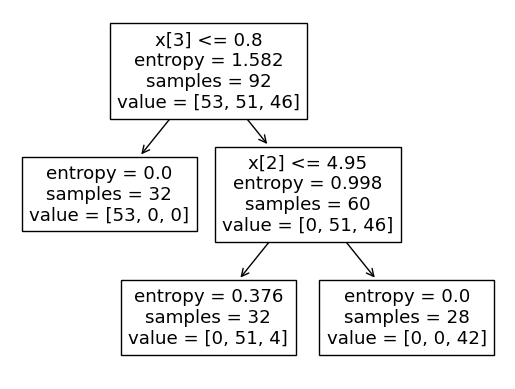

In [7]:
estimator = model.estimators_[5]
tree.plot_tree(estimator)